# LSTM population and weather data using pytorch 

In [33]:
# import pandas as pd
# import psycopg2
# import datetime
# import matplotlib.pyplot as plt

# # 訓練期間とテスト期間を日付で指定
# train_start_date = '2018-07-01 00:00:00'
# train_end_date = '2018-06-30 23:59:59'
# test_start_date = '2018-07-01 00:00:00'
# test_end_date = '2018-07-11 01:00:00'

# # データベースの接続情報
# connection_config = {
#     'user': 'shin',
#     'password': 'shin_password',
#     'port': '5432',
#     'database': 'mobaku_base',
#     'host': '10.33.230.198'
# }
# connection = psycopg2.connect(**connection_config)

# # SQLクエリでデータの範囲を設定
# sql_query = f"""
# SELECT datetime, SUM(population) AS total_population
# FROM population_00000
# WHERE mesh_id IN (
#     513375263, 513375264, 513375273, 513375323, 513375324, 513375332, 513375333, 513375334,
#     513375341, 513375342, 513375344, 513375353, 513375354, 513375361, 513375363, 513375371, 513375373,
#     513375421, 513375423, 513375471, 513375472, 513375474, 513375521, 513375522, 513375531, 513375533,
#     513375534, 513375543, 513375544, 513375572, 513375581, 513375583, 513375642, 513375651, 513375653,
#     513375681, 513375683, 513375751, 513375752, 513375754, 513375781, 513375783, 513375852, 513375861,
#     513375862, 513375864, 513375881, 513375883, 513375962, 513375971, 513375972, 513375981
# )
# AND datetime BETWEEN '{train_start_date}' AND '{test_end_date}'
# GROUP BY datetime
# ORDER BY datetime;
# """

# df = pd.read_sql(sql=sql_query, con=connection)

# # 日付をインデックスに設定
# df['datetime'] = pd.to_datetime(df['datetime'])
# df = df.set_index('datetime')

# # 訓練データとテストデータに分割
# df_train = df.loc[train_start_date:train_end_date]
# df_test = df.loc[test_start_date:test_end_date]

# # データフレームの表示（オプション）
# print(df_train)
# print(df_test)

# # グラフの描画
# plt.figure(figsize=(12, 6))
# df_train['total_population'].plot(label='Train Total Population')
# df_test['total_population'].plot(label='Test Total Population')
# plt.xlabel('Date')
# plt.ylabel('Total Population')
# plt.title('Total Population Over Time')
# plt.legend()

# # 主グリッドの設定
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# # 補助グリッドの設定
# plt.minorticks_on()
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# plt.show()

参考

https://disassemble-channel.com/lstm-multivariate-time-series/

## get area ID

In [34]:
# import pandas as pd
# PATH = '/Users/shin/Documents/onedrive-移行2024年5月1日/00_project/01_kurashiki_collecting_externaldata/outline.csv'
# df = pd.read_csv(PATH)
# print(df.head())

# # KEY_CODEを追加していく
# areas = []
# for area in df['KEY_CODE']:
#     # print(area)
#     areas.append(area)

# print()
# print(f'{len(areas)} areas in total：{areas}')

# # 保留
# areas_str=''
# for k in areas:
#     areas_str+=(str(k)+',')
# # print(areas_str)

## get population

In [35]:
import pandas as pd
import psycopg2
# データベースの接続情報
connection_config = {
    'user': 'shin',
    'password': 'shin_password',
    'port': '5432',
    'database': 'mobaku_base',
    'host': '10.33.230.198'
}
connection = psycopg2.connect(**connection_config)

In [36]:
# データを取得（datetimeごとのpopulation合計を計算）
sql_query = """
SELECT datetime, SUM(population) AS total_population
FROM population_00000
WHERE mesh_id IN (
    513375263, 513375264, 513375273, 513375323, 513375324, 513375332, 513375333, 513375334,
    513375341, 513375342, 513375344, 513375353, 513375354, 513375361, 513375363, 513375371, 513375373,
    513375421, 513375423, 513375471, 513375472, 513375474, 513375521, 513375522, 513375531, 513375533,
    513375534, 513375543, 513375544, 513375572, 513375581, 513375583, 513375642, 513375651, 513375653,
    513375681, 513375683, 513375751, 513375752, 513375754, 513375781, 513375783, 513375852, 513375861,
    513375862, 513375864, 513375881, 513375883, 513375962, 513375971, 513375972, 513375981
)
AND datetime BETWEEN '2018-04-01 01:00:00' AND '2018-07-9 01:00:00'
GROUP BY datetime
ORDER BY datetime;
"""
df = pd.read_sql(sql=sql_query, con=connection)

# データフレームの表示（オプション）
df

/var/folders/sz/wz3fwctj09n4x7hz4ry03tqh0000gn/T/ipykernel_35350/2100513653.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql=sql_query, con=connection)


,datetime,total_population
0,2018-04-01 01:00:00,5152
1,2018-04-01 02:00:00,4999
2,2018-04-01 03:00:00,5230
3,2018-04-01 04:00:00,5701
4,2018-04-01 05:00:00,5474
...,...,...
2372,2018-07-08 21:00:00,1476
2373,2018-07-08 22:00:00,1503
2374,2018-07-08 23:00:00,1585
2375,2018-07-09 00:00:00,1396


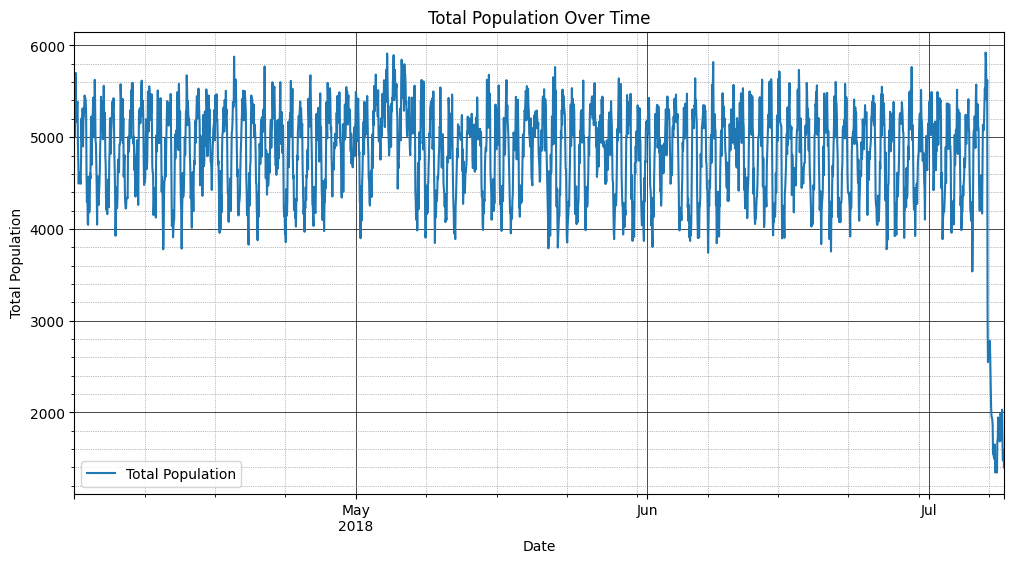

In [37]:
import matplotlib.pyplot as plt
df=df.set_index(df['datetime'])
# df['total_population'].plot()


# グラフの描画
plt.figure(figsize=(12, 6))
df['total_population'].plot(label='Total Population')
plt.xlabel('Date')
plt.ylabel('Total Population')
plt.title('Total Population Over Time')
plt.legend()

# 主グリッドの設定
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# 補助グリッドの設定
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.show()

## 以下，避難所のある6メッシュのみでのプロット

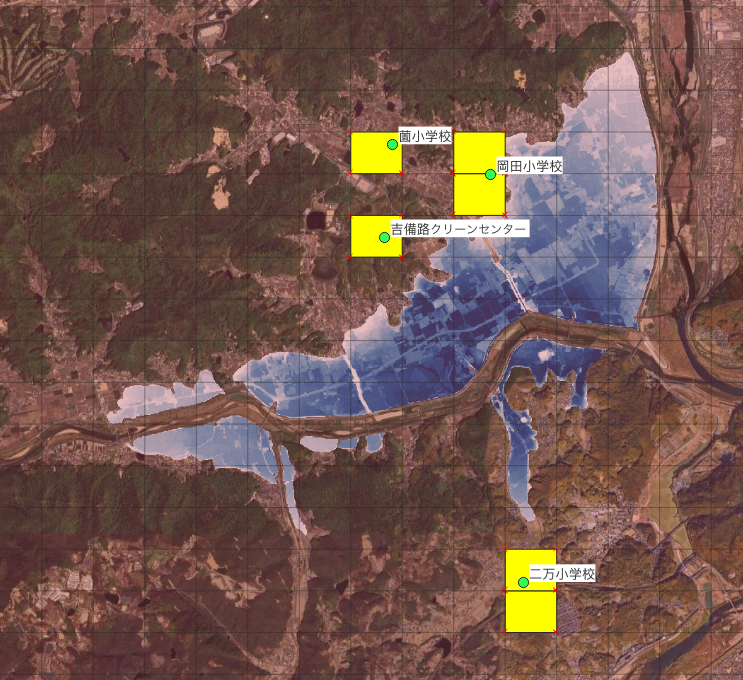

In [38]:
# データを取得（datetimeごとのpopulation合計を計算）
sql_query = """
SELECT datetime, SUM(population) AS total_population
FROM population_00000
WHERE mesh_id IN (
    513375763,513375761,513375753,513375653,513375264,513375262
)
AND datetime BETWEEN '2018-04-01 01:0:00' AND '2018-07-9 01:00:00'
GROUP BY datetime
ORDER BY datetime;
"""

# sql_query = """
# SELECT datetime, SUM(population) AS total_population
# FROM population_00000
# WHERE mesh_id IN (
#     513375263, 513375264, 513375273, 513375323, 513375324, 513375332, 513375333, 513375334,
#     513375341, 513375342, 513375344, 513375353, 513375354, 513375361, 513375363, 513375371, 513375373,
#     513375421, 513375423, 513375471, 513375472, 513375474, 513375521, 513375522, 513375531, 513375533,
#     513375534, 513375543, 513375544, 513375572, 513375581, 513375583, 513375642, 513375651, 513375653,
#     513375681, 513375683, 513375751, 513375752, 513375754, 513375781, 513375783, 513375852, 513375861,
#     513375862, 513375864, 513375881, 513375883, 513375962, 513375971, 513375972, 513375981
# )
# AND datetime BETWEEN '2018-04-01 01:00:00' AND '2018-07-9 01:00:00'
# GROUP BY datetime
# ORDER BY datetime;
# """

date_st = '201804010100'
date_en = '201807090100'

df_pop = pd.read_sql(sql=sql_query, con=connection)

# データフレームの表示（オプション）
df_pop

/var/folders/sz/wz3fwctj09n4x7hz4ry03tqh0000gn/T/ipykernel_35350/719333844.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pop = pd.read_sql(sql=sql_query, con=connection)


,datetime,total_population
0,2018-04-01 01:00:00,998
1,2018-04-01 02:00:00,884
2,2018-04-01 03:00:00,997
3,2018-04-01 04:00:00,791
4,2018-04-01 05:00:00,833
...,...,...
2372,2018-07-08 21:00:00,151
2373,2018-07-08 22:00:00,145
2374,2018-07-08 23:00:00,92
2375,2018-07-09 00:00:00,90


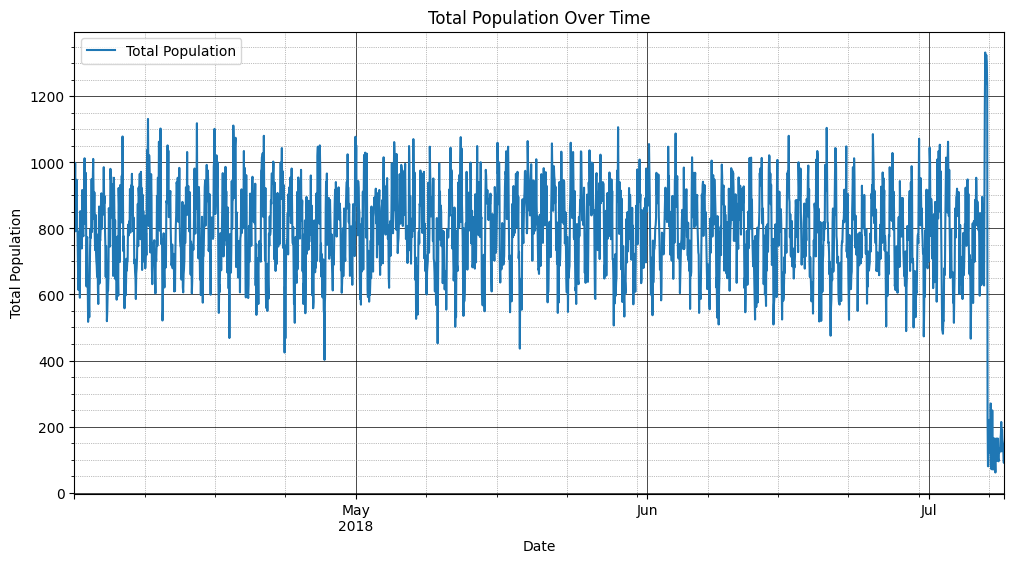

In [39]:
df_pop=df_pop.set_index(df_pop['datetime'])
# df_pop['total_population'].plot()


# グラフの描画
plt.figure(figsize=(12, 6))
df_pop['total_population'].plot(label='Total Population')
plt.xlabel('Date')
plt.ylabel('Total Population')
plt.title('Total Population Over Time')
plt.legend()

# 主グリッドの設定
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# 補助グリッドの設定
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# グラフを表示
plt.show()

In [40]:
# datetime列をdatetime型に変換
df_pop['datetime'] = pd.to_datetime(df_pop['datetime'])

# データフレームの表示
df_pop

,datetime,total_population
datetime,,
2018-04-01 01:00:00,2018-04-01 01:00:00,998
2018-04-01 02:00:00,2018-04-01 02:00:00,884
2018-04-01 03:00:00,2018-04-01 03:00:00,997
2018-04-01 04:00:00,2018-04-01 04:00:00,791
2018-04-01 05:00:00,2018-04-01 05:00:00,833
...,...,...
2018-07-08 21:00:00,2018-07-08 21:00:00,151
2018-07-08 22:00:00,2018-07-08 22:00:00,145
2018-07-08 23:00:00,2018-07-08 23:00:00,92


In [41]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
from torch import nn,optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import transforms
from torchinfo import summary
from torch.autograd import Variable

# --- 外部情報 st

In [42]:
import matplotlib.pyplot as plt
import csv
import datetime

# PATH = r'/Users/shin/Documents/onedrive-移行2024年5月1日/00_project/01_kurashiki_collecting_externaldata/csv_data/kurashiki_raw_data.csv'
PATH = f'/Users/shin/Documents/onedrive-移行2024年5月1日/00_project/01_kurashiki_collecting_externaldata/csv_data/kurashiki_20180401_20180731.csv'
# PATH = r'/home/shin/lab/00_project/kurashiki_raw_data.csv'

# date_st = '201804010100'
# date_en = '201807090100'

In [43]:
import datetime

timeLine=[]

y_precipitation=[]
num_precipitation=4

y_temperature=[]
num_temperature=6

y_windspeed=[]
num_windspeed=8

print(f'date_st: {date_st}')
print(f'date_en: {date_en}')


with open(PATH,'r',encoding='cp932') as csvfile:
    hours =csv.reader(csvfile,delimiter=',')
    for hour in hours:
        # ヘッダー部分をカットする
        if int(hour[0])>2:
            # print(hour)

            # hour[1]~hour[4]を用いてhour_keyを作成するパート-----------------------------------
            # hour[1]などはもともとstrだから,intに直す(→するとstrに戻すときに2桁表示が可能になる)
            val_year=int(hour[0])
            val_month=int(hour[1])
            val_day=int(hour[2])
            val_hour=int(hour[3])
            # 合体させる
            hour_str = f"{val_year:04}" + f"{val_month:02}" + f"{val_day:02}" + f"{val_hour:02}" + "00"
            #print(hour_str)

            # データを抽出してリストを作るパート------------------------------------------
            if date_st <= hour_str and hour_str <= date_en:
                # days
                val_year=int(hour[0])
                val_month=int(hour[1])
                val_day=int(hour[2])
                val_hour=int(hour[3])
                print(val_year,val_month,val_day,val_hour)

                if val_hour ==24:
                    val_hour=0
                    hour_key = datetime.datetime(val_year,val_month,val_day,val_hour) + datetime.timedelta(days=1)
                else:
                    hour_key = datetime.datetime(val_year,val_month,val_day,val_hour)


                # X axis
                timeLine.append(hour_key)

                # Precipitation
                y_precipitation.append(float(hour[num_precipitation]))

                # Temperature
                y_temperature.append(float(hour[num_temperature]))

                # WindSpeed
                y_windspeed.append(float(hour[num_windspeed]))


date_st: 201804010100
date_en: 201807090100
2018 4 1 1
2018 4 1 2
2018 4 1 3
2018 4 1 4
2018 4 1 5
2018 4 1 6
2018 4 1 7
2018 4 1 8
2018 4 1 9
2018 4 1 10
2018 4 1 11
2018 4 1 12
2018 4 1 13
2018 4 1 14
2018 4 1 15
2018 4 1 16
2018 4 1 17
2018 4 1 18
2018 4 1 19
2018 4 1 20
2018 4 1 21
2018 4 1 22
2018 4 1 23
2018 4 1 24
2018 4 2 1
2018 4 2 2
2018 4 2 3
2018 4 2 4
2018 4 2 5
2018 4 2 6
2018 4 2 7
2018 4 2 8
2018 4 2 9
2018 4 2 10
2018 4 2 11
2018 4 2 12
2018 4 2 13
2018 4 2 14
2018 4 2 15
2018 4 2 16
2018 4 2 17
2018 4 2 18
2018 4 2 19
2018 4 2 20
2018 4 2 21
2018 4 2 22
2018 4 2 23
2018 4 2 24
2018 4 3 1
2018 4 3 2
2018 4 3 3
2018 4 3 4
2018 4 3 5
2018 4 3 6
2018 4 3 7
2018 4 3 8
2018 4 3 9
2018 4 3 10
2018 4 3 11
2018 4 3 12
2018 4 3 13
2018 4 3 14
2018 4 3 15
2018 4 3 16
2018 4 3 17
2018 4 3 18
2018 4 3 19
2018 4 3 20
2018 4 3 21
2018 4 3 22
2018 4 3 23
2018 4 3 24
2018 4 4 1
2018 4 4 2
2018 4 4 3
2018 4 4 4
2018 4 4 5
2018 4 4 6
2018 4 4 7
2018 4 4 8
2018 4 4 9
2018 4 4 10
2018 4 4

In [44]:
# pop_hours_max = max(pop_hours)
# pop_hours_min = min(pop_hours)

y_precipitation_max = max(y_precipitation)
y_precipitation_min = min(y_precipitation)

y_windspeed_max = max(y_windspeed)
y_windspeed_min = min(y_windspeed)

y_temperature_max = max(y_temperature)
y_temperature_min = min(y_temperature)

# pop_hours_standard       = [((n-pop_hours_min)/(pop_hours_max-pop_hours_min)) for n in pop_hours]
y_precipitation_standard = [((n-y_precipitation_min)/(y_precipitation_max-y_precipitation_min)) for n in y_precipitation]
y_windspeed_standard     = [((n-y_windspeed_min)/(y_windspeed_max-y_windspeed_min)) for n in y_windspeed]
y_temperature_standard   = [((n-y_temperature_min)/(y_temperature_max-y_temperature_min)) for n in y_temperature]


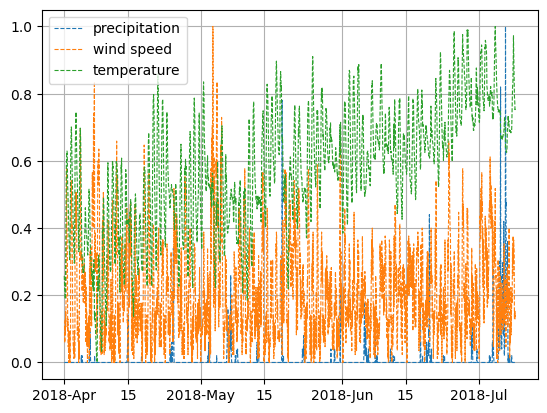

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig,ax  = plt.subplots()

# ax.plot_date(timeLine,pop_hours_standard,'-',label='population',linewidth=2.5)
ax.plot_date(timeLine,y_precipitation_standard,'--',label='precipitation',linewidth = '0.8')
ax.plot_date(timeLine,y_windspeed_standard,'--',label='wind speed',linewidth = '0.8')
ax.plot_date(timeLine,y_temperature_standard,'--',label='temperature',linewidth = '0.8')
ax.legend()
ax.grid()

#step4 軸のカスタム
locator = mdates.AutoDateLocator(maxticks=15,minticks=15)
ax.xaxis.set_major_locator(locator)

# 変更 '%b'→'%Y-%b'
formats=['%Y', '%Y-%b', '%d', '%H:%M', '%H:%M', '%S.%f']
formatter = mdates.ConciseDateFormatter(locator, formats=formats, show_offset=False)
ax.xaxis.set_major_formatter(formatter)

plt.show()

## ここでdf_exに対して外部情報を入れ込む

In [46]:
# 時系列をdatetime形式に変換
timeLine = pd.to_datetime(timeLine)

# 新しいDataFrameを作成
df_ex = pd.DataFrame({
    'time': timeLine,
    'population': df_pop['total_population'],
    'precipitation': y_precipitation,
    'temperature': y_temperature,
    'windspeed': y_windspeed
})

# 時系列をインデックスに設定
df_ex = df_ex.set_index('time')

print(df_ex)


                     population  precipitation  temperature  windspeed
time                                                                  
2018-04-01 01:00:00         998            0.0         10.3        0.9
2018-04-01 02:00:00         884            0.0          9.7        0.9
2018-04-01 03:00:00         997            0.0          9.2        0.9
2018-04-01 04:00:00         791            0.0          9.1        0.5
2018-04-01 05:00:00         833            0.0          8.7        1.0
...                         ...            ...          ...        ...
2018-07-08 21:00:00         151            0.0         25.9        1.1
2018-07-08 22:00:00         145            0.0         25.6        1.2
2018-07-08 23:00:00          92            0.0         25.3        1.3
2018-07-09 00:00:00          90            0.0         24.7        1.1
2018-07-09 01:00:00         120            0.0         24.8        1.3

[2377 rows x 4 columns]


### 他変量時系列の予測をLSTMで！
6列のデータを用いて，LSTMのアルゴリズムでave_tmpの推論を行っていく！


### まずはデータの正規化から

In [47]:
scaler = MinMaxScaler() 
# MinMaxScaler :  scikit learn のモジュール
df_ex_scaled = scaler.fit_transform(df_ex[['population','precipitation', 'temperature', 'windspeed']])

# df_ex_scaled 中を確認
for i in df_ex_scaled:
    print(i)

[0.73721479 0.         0.25773196 0.10588235]
[0.64752164 0.         0.2371134  0.10588235]
[0.73642801 0.         0.21993127 0.10588235]
[0.5743509  0.         0.21649485 0.05882353]
[0.60739575 0.         0.20274914 0.11764706]
[0.68607396 0.         0.18900344 0.12941176]
[0.69708891 0.         0.20274914 0.08235294]
[0.58143194 0.         0.28178694 0.15294118]
[0.57513769 0.         0.36426117 0.10588235]
[0.49488592 0.         0.44329897 0.17647059]
[0.43509048 0.         0.50171821 0.18823529]
[0.45712038 0.         0.59106529 0.37647059]
[0.57356412 0.         0.60137457 0.57647059]
[0.54681353 0.         0.62199313 0.48235294]
[0.41620771 0.         0.62886598 0.42352941]
[0.62234461 0.         0.62886598 0.4       ]
[0.55153423 0.         0.604811   0.32941176]
[0.59795437 0.         0.5532646  0.27058824]
[0.60110149 0.         0.52233677 0.09411765]
[0.53343824 0.         0.51202749 0.12941176]
[0.67269866 0.         0.48797251 0.04705882]
[0.62313139 0.         0.46391753 

In [48]:
max_avetem= max(df_ex['population'])
min_avetem= min(df_ex['population'])

max_avetem,min_avetem

(1332, 61)

In [49]:
# 日付を具体的に指定して分割する
split_date = '2018-07-01'  # 例として、2018年6月1日を分割日とする

# 指定した日付より前のデータを訓練用、以降のデータをテスト用とする
df_train = df_ex.loc[df_ex.index < split_date]
df_test = df_ex.loc[df_ex.index >= split_date]

df_train = scaler.fit_transform(df_train[['population','precipitation', 'temperature', 'windspeed']])
df_test = scaler.fit_transform(df_test[['population','precipitation', 'temperature', 'windspeed']])

# 訓練期間とテスト期間

In [50]:
# テスト用と訓練用で分割
# df_train, df_test = train_test_split(df_ex_scaled, test_size=0.3, shuffle=False)
    # train_test_split　：　scikit learn のモジュール
    # df_train : [135 x 4]
    # df_test  : [ 58 x 4]
    # df_scaled: [193 x 4] 

    
window_size = 20
n_data = len(df_ex) - window_size + 1 -1
    # len(df_ex)= 193 [int]
    # n_data = 173 [int]
n_dim = df_train.shape[1]
    # 4
n_train = len(df_train) - window_size + 1 - 1
    # 115
n_test = len(df_test) - window_size + 1 - 1
    # 38
# 正解データを準備
train = np.zeros((n_train, window_size, n_dim))
    # np.zeros((115,20,4))
    # (115, 20, 4)
    # (115 x 20 が 4層 ある)
train_labels = np.zeros((n_train, n_dim))
    # 115 x 4
for i in range(n_train):
    train[i] = df_train[i:i+window_size]
    # train[i]: [20 x 4] 
    # train[0]: df_train[0:20]のデータが入る．
    # train[1]: df_train[1:21]のデータが入る．
    train_labels[i] = df_train[i+window_size]
    # train_labels[i]: [1 x 6] 
    # train_labels[0]: df_train[20]のデータが入る．
    # train_labels[1]: df_train[21]のデータが入る．

# テストデータを準備
test = np.zeros((n_test, window_size, n_dim))
   # np.zeros((38,20,4))
   # 38 x 20 x 4
test_labels = np.zeros((n_test, n_dim))
    # 38 x  4  
for i in range(n_test):
    test[i] = df_test[i:i+window_size]
    # test[i]: shape is (20, 4)
    # test[0]: df_test[0:20]のデータが入る．
    # test[1]: df_test[1:21]のデータが入る．
    test_labels[i] = df_test[i+window_size]
    # test_labels[i]: shape is (int)
    # test_labels[0]: df_test[20]のデータが入る．
    # test_labels[1]: df_test[21]のデータが入る．

# 訓練ラベルの用意。
# 今回は人口を予測する
train_labels =train_labels[:, 2]

### tips
train_labelはtrain の最後の値よりも一つ先の値を取得していることに注意する．

    train[i] = df_train[i:i+window_size]
    # train[i]: [20 x 6] 
    # train[0]: df_train[0:20]のデータが入る.
**(df_train[0],df_train[1],df_train[2],...,df_train[18],df_train[19])**

    train_labels[i] = df_train[i+window_size]
    # train_labels[i]: [1 x 6] 
    # train_labels[0]: df_train[20]のデータが入る．
**(df_train[20])**






In [51]:
print(test[0]) 
# 20 x 6

print()

print(test_labels[0])
# 1 x 6

[[0.50275374 0.         0.33027523 0.19230769]
 [0.64280094 0.         0.30275229 0.17307692]
 [0.77340677 0.         0.26605505 0.09615385]
 [0.74193548 0.         0.25688073 0.01923077]
 [0.60110149 0.         0.23853211 0.07692308]
 [0.56333596 0.         0.24770642 0.23076923]
 [0.65145555 0.         0.27522936 0.17307692]
 [0.63335956 0.         0.43119266 0.51923077]
 [0.51455547 0.         0.52293578 0.71153846]
 [0.50904799 0.         0.62385321 0.65384615]
 [0.58221873 0.         0.69724771 0.78846154]
 [0.43902439 0.         0.78899083 0.59615385]
 [0.56412274 0.         0.79816514 0.84615385]
 [0.61526357 0.         0.77981651 0.84615385]
 [0.51612903 0.         0.79816514 0.82692308]
 [0.45318647 0.         0.81651376 0.69230769]
 [0.64437451 0.         0.85321101 0.82692308]
 [0.63493312 0.         0.81651376 0.92307692]
 [0.61919748 0.         0.74311927 0.73076923]
 [0.49881983 0.         0.62385321 0.78846154]]

[0.40676633 0.         0.55045872 0.63461538]


In [52]:
train = torch.tensor(train, dtype=torch.float)
labels = torch.tensor(train_labels, dtype=torch.float)
dataset = torch.utils.data.TensorDataset(train, labels)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

## モデルを定義

In [53]:
# 多変量を入力して、１変数の予測結果を返すLSTNモデル.
class MyLSTM(nn.Module):
    def __init__(self, feature_size, hidden_dim, n_layers):
        super(MyLSTM, self).__init__()

        self.feature_size = feature_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.n_output = 1

        self.lstm = nn.LSTM(feature_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, self.n_output)

    def forward(self, x):
        # hidden state
        h_0 = Variable(torch.zeros(self.n_layers, x.size(0), self.hidden_dim))
        # cell state
        c_0 = Variable(torch.zeros(self.n_layers, x.size(0), self.hidden_dim))
        
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn.view(-1, self.hidden_dim) 
        y = self.fc(hn)
        y = y.reshape(self.n_output, -1)

        return y


feature_size  = 4
n_hidden  = 64
n_layers  = 1

net = MyLSTM(feature_size, n_hidden, n_layers)

In [54]:
summary(net)

Layer (type:depth-idx)                   Param #
MyLSTM                                   --
├─LSTM: 1-1                              17,920
├─Linear: 1-2                            65
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0

## LSTMモデルの学習

In [55]:
func_loss = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
    ## 最適化を図るための仕組みとして，Adamを使う．
loss_history = []
device = torch.device("cuda:0" if torch.cuda. is_available() else "cpu")
epochs = 200

net.to(device)

MyLSTM(
  (lstm): LSTM(4, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [56]:
for i in range(epochs+1):
    net.train()
    tmp_loss = 0.0
    for j, (x, t) in enumerate(train_loader):
        x = x.to(device)
        optimizer.zero_grad()
        y = net(x) 
        y = y.to('cpu')
        loss = func_loss(y, t)
        loss.backward()
        optimizer.step() 
        tmp_loss += loss.item()
    tmp_loss /= j+1
    loss_history.append(tmp_loss)
    print('Epoch:', i, ', Loss_Train:', tmp_loss)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([1, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 , Loss_Train: 0.017331906080809433
Epoch: 1 , Loss_Train: 0.0024686778235663885
Epoch: 2 , Loss_Train: 0.0014997711509791962
Epoch: 3 , Loss_Train: 0.0010990963660795676
Epoch: 4 , Loss_Train: 0.0010173988804108073
Epoch: 5 , Loss_Train: 0.0008637006931978128
Epoch: 6 , Loss_Train: 0.0008179482739417831
Epoch: 7 , Loss_Train: 0.0006820623624033658
Epoch: 8 , Loss_Train: 0.0006557685636971403
Epoch: 9 , Loss_Train: 0.0006182844952141319
Epoch: 10 , Loss_Train: 0.000605893540945504
Epoch: 11 , Loss_Train: 0.000555367429304963
Epoch: 12 , Loss_Train: 0.0005391952331550592
Epoch: 13 , Loss_Train: 0.0005781369835742643
Epoch: 14 , Loss_Train: 0.0005708835681065207
Epoch: 15 , Loss_Train: 0.0005141381730001988
Epoch: 16 , Loss_Train: 0.0005055110923833913
Epoch: 17 , Loss_Train: 0.0005408445645108038
Epoch: 18 , Loss_Train: 0.0005315598960661223
Epoch: 19 , Loss_Train: 0.0005175236484401988
Epoch: 20 , Loss_Train: 0.0005003221268602383
Epoch: 21 , Loss_Train: 0.0004953365306154748
E

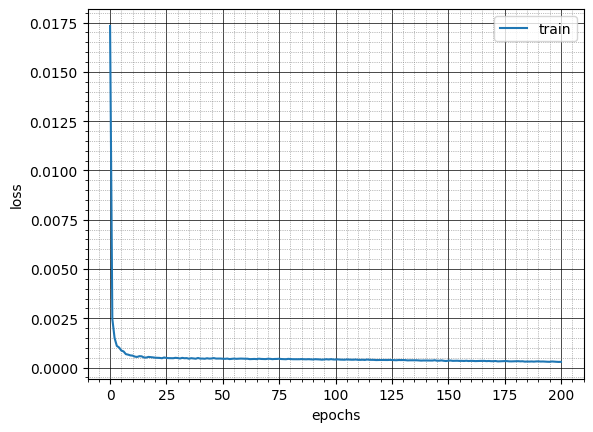

In [57]:
# 損失関数を描く

plt.plot(range(len(loss_history)), loss_history, label='train')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("loss")

# 主グリッドの設定
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# 補助グリッドの設定
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.show()

## 予測

In [58]:
predicted_train_plot = []
net.eval()

for k in range(n_train):
    x = torch.tensor(train[k])
    x = x.reshape(1, window_size, feature_size)
    x = x.to(device).float()
    y = net(x)
    y = y.to('cpu')
    predicted_train_plot.append(y[0].item())
    

/var/folders/sz/wz3fwctj09n4x7hz4ry03tqh0000gn/T/ipykernel_35350/1814804422.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(train[k])


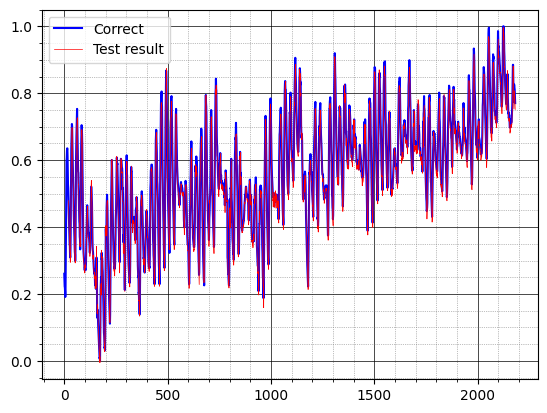

In [59]:
plt.plot(range(len(df_train)), df_train[:, 2], label='Correct', color='blue')
plt.plot(range(window_size, window_size+len(predicted_train_plot)), predicted_train_plot, label='Test result',linewidth=0.5, color='red')
plt.legend()

# 主グリッドの設定
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# 補助グリッドの設定
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.show()

↑

train データ で試しに モデルを実行した結果．ほぼ完全に一致している．


In [60]:
predicted_test_plot = []
net.eval()

for k in range(n_test):
    x = torch.tensor(test[k])
    x = x.reshape(1, window_size, feature_size)
    x = x.to(device).float()
    y = net(x)
    y = y.to('cpu')
    predicted_test_plot.append(y[0].item())

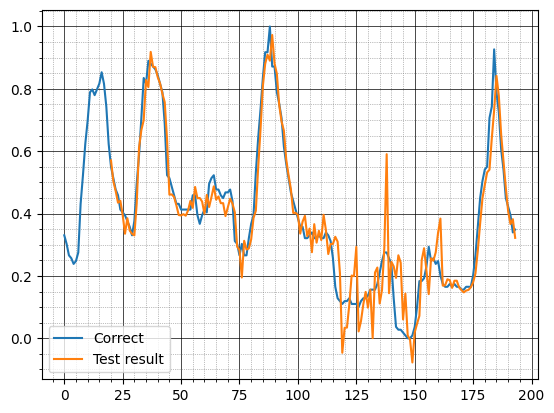

In [61]:
plt.plot(range(len(df_test)), df_test[:, 2], label='Correct')
plt.plot(range(window_size, window_size+len(predicted_test_plot)), predicted_test_plot, label='Test result')
plt.legend()

# 主グリッドの設定
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# 補助グリッドの設定
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.show()

↑

test データを予測した結果 ( 正規化 )

In [62]:
predicted_test_plot_inversed = np.array(predicted_test_plot) * (max_avetem-min_avetem) + min_avetem
# print(predicted_test_plot_inversed)

In [63]:
df_test_inversed = np.array(df_test[:,2]) * (max_avetem-min_avetem) + min_avetem


MAPE: 21.48%


/var/folders/sz/wz3fwctj09n4x7hz4ry03tqh0000gn/T/ipykernel_35350/3190570516.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2018-07-01', periods=len(df_test_inversed_plt), freq='H')


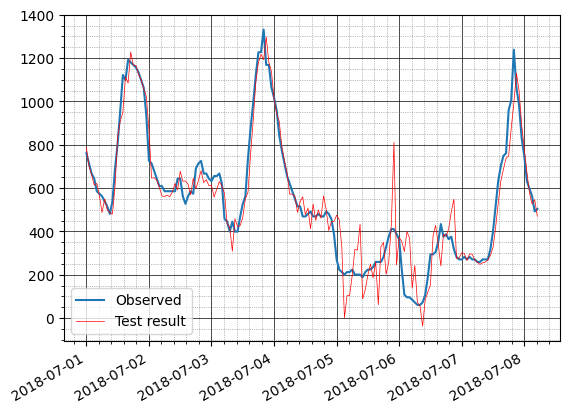

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 正解データと予測結果のデータを用意します
df_test_inversed_plt = df_test_inversed[20:]
predicted_test_plot_inversed_plt = predicted_test_plot_inversed[0:]

# 仮定の日時データを生成します（ここでは1時間おきのデータを使用）
date_rng = pd.date_range(start='2018-07-01', periods=len(df_test_inversed_plt), freq='H')
predicted_date_rng = date_rng[:len(predicted_test_plot_inversed_plt)]

# MAPEの計算
def calculate_mape(true_values, predicted_values):
    true_values, predicted_values = np.array(true_values), np.array(predicted_values)
    return np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

mape = calculate_mape(df_test_inversed_plt[:len(predicted_test_plot_inversed_plt)], predicted_test_plot_inversed_plt)
print(f'MAPE: {mape:.2f}%')

# プロット
plt.plot(date_rng, df_test_inversed_plt, label='Observed')
plt.plot(predicted_date_rng, predicted_test_plot_inversed_plt, label='Test result', linewidth='0.5', color='red')
plt.legend()

# 主グリッドの設定
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# 補助グリッドの設定
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# 日時をX軸に設定
plt.gcf().autofmt_xdate()

plt.show()
